# Exploration data analysis of avalanche events in french Alps

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Table of contents

<ul>
    <li><a href="#reading">1. Reading dataset and viewing general info</a></li>    
    <li><a href="#viz">2. Visualization and data cleaning for viz</a></li>
        <ul>
            <li><a href="#viz_1">2.1 Visualization of most dangerous months for avalanche events</a></li>  
            <li><a href="#viz_2">2.2 Visualization of most dangerous altitudes for avalanche events</a></li>
            <li><a href="#viz_3">2.3 Renaming massifs names to fit massifs we have in shapefile</a></li>
            <li><a href="#viz_4">2.4 Cleaning data for getting sum of avalanche events for each massif </a></li>
            <li><a href="#viz_5">2.5 Import of data from shapefile for later geospatial visualization</a></li>
            <li><a href="#viz_6">2.6 Geospatial visualization with Bokeh</a></li>
        </ul>
</ul>

<a id='reading'></a>
## Reading dataset and viewing general info

In [2]:
# reading dataset based on data provided by data-avalanche.org
pd.set_option('display.max_columns', 500)
aval = pd.read_excel(r"aval_alps_2010_2019_org.xls")
aval.head()

,Id,Pays,Massif,Sommet/secteur,itinéraire,Orientation,Date,year,month,day,date_format,Heure,Description,Décl à distance,Distance décl,Caractéristique,Dénivelé,Origine principale,Origine secondaire,Alti départ,Commentaire zone départ,Epaisseur rupture,Epaisseur max rupture,Longueur rupture,Ecoulement principal,Commentaire type écoulement,Alti arrivée,Commentaire zone arrivée,Qualité neige,Commentaire qualité neige,Commentaire qualité transportée,Risque MF
0,1557382479001,France,Aiguilles de l'Argentiere/ Sept Laux,col de l'Amiante,Départ de Rieux Claret pour direction du Roche...,E,07/05/2019,2019,5,7,2019-05-07,11:00,Départ provoqué par une skieuse lors de la des...,False,0,NaN,0,Skieur rando. descente,Neige,2750,NaN,0,50,0,NaN,NaN,2700,NaN,NaN,NaN,NaN,Inconnu
1,50000560,France,Aiguilles Rouges,L'Index,NaN,SE,18/12/2010,2010,12,18,2010-12-18,13:00:00,Une plaque friable a été déclenchée par un ski...,False,0,Plaque friable,200,Skieur hors piste,NaN,2150,L'épaisseur de la rupture était de 40 à 80 cm ...,40,80,20,NaN,NaN,1950,NaN,NaN,NaN,NaN,3 - MARQUE
2,50000693,France,Aiguilles Rouges,Brévent,Combe de Charlanon,T,23/01/2012,2012,1,23,2012-01-23,NaN,Cette plaque décrite comme &quot;monstrueuse&q...,False,0,Plaque de fond,0,Inconnue,NaN,2000,NaN,0,0,0,Dense,NaN,0,NaN,NaN,NaN,NaN,2 - LIMITE
3,1390063748315,France,Aiguilles Rouges,Col de Bérard,Traversée Crochues - Bérard,W,18/01/2014,2014,1,18,2014-01-18,NaN,Un petit incident qui remet les pendules à l'h...,False,0,Plaque à vent,150,Skieur rando. montée,NaN,2400,NaN,0,0,0,NaN,NaN,0,NaN,NaN,séche dense,NaN,3 - MARQUE
4,1426167935840,France,Aiguilles Rouges,Flégère,Lac Blanc,SE,06/03/2015,2015,3,6,2015-03-06,NaN,Avalanche probablement partie spontanément. <b...,False,0,Plaque à vent,0,NaN,NaN,2280,NaN,0,0,0,Dense,NaN,0,NaN,Sèche dure,NaN,NaN,3 - MARQUE


In [3]:
# displaying general info
aval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               1167 non-null   int64         
 1   Pays                             1167 non-null   object        
 2   Massif                           1167 non-null   object        
 3   Sommet/secteur                   1122 non-null   object        
 4   itinéraire                       904 non-null    object        
 5   Orientation                      1167 non-null   object        
 6   Date                             1167 non-null   object        
 7   year                             1167 non-null   int64         
 8   month                            1167 non-null   int64         
 9   day                              1167 non-null   int64         
 10  date_format                      1167 non-null   datetime64[

In [4]:
aval.columns

Index(['Id', 'Pays', 'Massif', 'Sommet/secteur', 'itinéraire', 'Orientation',
       'Date', 'year', 'month', 'day', 'date_format', 'Heure', 'Description',
       'Décl à distance', 'Distance décl', 'Caractéristique', 'Dénivelé',
       'Origine principale', 'Origine secondaire', 'Alti départ',
       'Commentaire zone départ', 'Epaisseur rupture', 'Epaisseur max rupture',
       'Longueur rupture', 'Ecoulement principal',
       'Commentaire type écoulement', 'Alti arrivée',
       'Commentaire zone arrivée', 'Qualité neige',
       'Commentaire qualité neige', 'Commentaire qualité transportée',
       'Risque MF'],
      dtype='object')

In [5]:
aval.shape

(1167, 32)

<a id='viz'></a>
## Visualization end EDA
<a id='viz_1'></a>
### Visualization of most dangerous months for avalanche events

In [6]:
# creating dataframe with monthly data
df_monthly = aval["month"].value_counts()
df_monthly =df_monthly.to_frame().reset_index()
df_monthly.head(6)

,index,month
0,3,250
1,2,238
2,1,207
3,12,170
4,4,164
5,5,80


In [7]:
# renaming columns
df_monthly.columns = ['month', 'avalanche events count']
df_monthly.head(6)

,month,avalanche events count
0,3,250
1,2,238
2,1,207
3,12,170
4,4,164
5,5,80


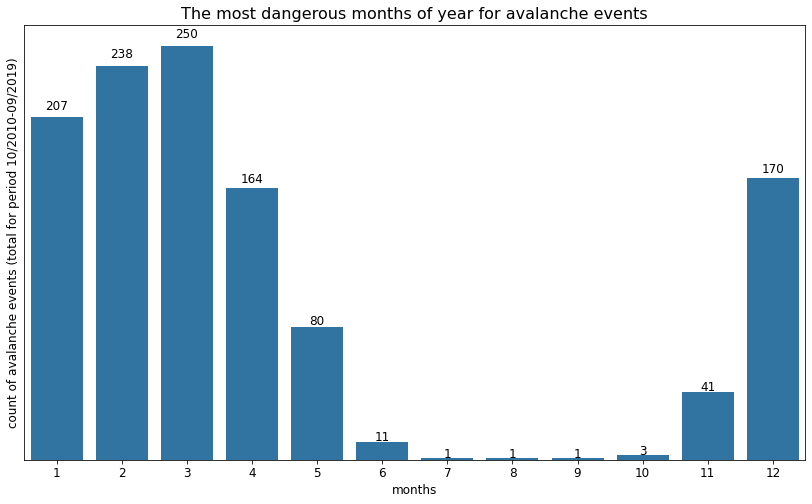

In [8]:
# final visualization of avalanche events by months
plt.figure(figsize=(14,8))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df_monthly, x='month', y='avalanche events count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(yticks=[])
plt.title('The most dangerous months of year for avalanche events', fontsize=16)
plt.xlabel('months', fontsize=12)
plt.ylabel('count of avalanche events (total for period 10/2010-09/2019)', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_months_events', bbox_inches='tight', dpi=600)
plt.show();

In [9]:
# checking all records for summer avalanches
summer = [6, 7, 8]
aval[aval["month"].isin(summer)]

,Id,Pays,Massif,Sommet/secteur,itinéraire,Orientation,Date,year,month,day,date_format,Heure,Description,Décl à distance,Distance décl,Caractéristique,Dénivelé,Origine principale,Origine secondaire,Alti départ,Commentaire zone départ,Epaisseur rupture,Epaisseur max rupture,Longueur rupture,Ecoulement principal,Commentaire type écoulement,Alti arrivée,Commentaire zone arrivée,Qualité neige,Commentaire qualité neige,Commentaire qualité transportée,Risque MF
322,1370849251026,France,Haute Maurienne,Bonneval sur Arc,RD 902 - Accès au Col de l'Iseran ; secteur de...,S,05/06/2013,2013,6,5,2013-06-05,15:00,"Glissement de talus, ayant déposé un volume im...",False,0,Plaque de fond,0,Réchauffement,NaN,2025,NaN,80,0,0,Dense,NaN,1950,NaN,Humide,NaN,NaN,Inconnu
323,1371502161716,France,Haute Maurienne,Bonneval sur Arc,RD 902 - Accès au Col de l'Iseran ; Rocher des...,SW,16/06/2013,2013,6,16,2013-06-16,NaN,Cette avalanche semble avoir glissé en fin de ...,False,0,Plaque de fond,0,Réchauffement,NaN,2380,NaN,0,0,0,Dense,NaN,2260,Blocs durs sur la chaussée ; environ 5 m au pl...,Humide,NaN,NaN,Inconnu
385,1465317514101,France,Haute Maurienne,Pointe Longe Côte,NaN,N,07/06/2016,2016,6,7,2016-06-07,NaN,Vaste avalanche de vieille neige partie sponta...,False,0,NaN,0,Réchauffement,NaN,2900,NaN,0,0,0,Dense,NaN,2350,NaN,Humide,NaN,NaN,Inconnu
484,1559715138917,France,Haute Maurienne,Pointe Longe Côte,NaN,NW,04/06/2019,2019,6,4,2019-06-04,21:00,Encore une avalanche de grande ampleur due aux...,False,0,NaN,0,Réchauffement,NaN,3000,NaN,0,0,0,Mixte,NaN,2200,NaN,Humide,NaN,NaN,Inconnu
485,1560746599183,France,Haute Maurienne,Pointe Droset,NaN,NW,14/06/2019,2019,6,14,2019-06-14,16:30,Vaste avalanche spontanée partie à la faveur d...,False,0,NaN,0,NaN,NaN,2700,NaN,0,0,0,Dense,NaN,0,NaN,Humide,NaN,NaN,Inconnu
521,1370340719042,France,Haute Tarentaise,Col du Petit Saint Bernard,RD1090 ; aval du pont de la Marquise,W,02/06/2013,2013,6,2,2013-06-02,17:00,Avalanche descendue spontanément en fin d'aprè...,False,0,Départ ponctuel,300,Réchauffement,NaN,2300,NaN,0,0,0,Dense,NaN,2000,NaN,Humide,NaN,NaN,Inconnu
645,1371044207845,France,Lauzière,Col de la Madeleine,RD 94 - Couloir des Ardoisières,NE,11/06/2013,2013,6,11,2013-06-11,NaN,Avalanche descendue spontanément en après midi...,False,0,Plaque de fond,0,Réchauffement,NaN,1940,NaN,0,0,0,Dense,NaN,1850,NaN,Humide,NaN,NaN,Inconnu
701,50000782,France,Maurienne,Grand Galibier,Col du Galibier,T,06/06/2012,2012,6,6,2012-06-06,17:30:00,Tir positif pour la protection des travaux de ...,False,0,NaN,130,Minage de corniche,NaN,2680,NaN,0,0,0,Dense,NaN,2550,NaN,Mouillée,NaN,NaN,Inconnu
782,1349621647101,France,Mont Blanc,Mont Maudit,"Sur la ""Voie des Trois Monts""",N,12/07/2012,2012,7,12,2012-07-12,05:15,L'avalanche se serait déclenchée vers 4000m d'...,False,0,Plaque à vent,0,NaN,NaN,0,La plaque ferait 40cm d'épaisseur.,0,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,Inconnu
785,1382287820696,France,Mont Blanc,Mont Blanc du Tacul,Face Nord,N,13/08/2013,2013,8,13,2013-08-13,04:00,"""La coulée, provoquée par une chute de blocs d...",False,0,NaN,0,Chute de sérac,NaN,3950,NaN,0,0,0,NaN,NaN,3500,NaN,NaN,NaN,NaN,Inconnu


<a id='viz_2'></a>
### Visualization of most dangerous altitudes for avalanche events

In [10]:
# checking most dangerous altitudes
aval["Alti départ"].value_counts().to_frame().reset_index().sort_values(by=["Alti départ"], ascending=False).head(25)

,index,Alti départ
0,0,244
1,2300,47
2,2200,42
3,2400,42
4,2600,39
5,2700,39
6,2500,32
7,2000,31
8,2900,28
10,3000,26


In [11]:
# regrouping altitude values
aval['altitude_edited'] = aval["Alti départ"].apply(lambda x:
                                     None if x < 1000
                                    else "1000 - 1499" if x < 1500
                                    else "1500 - 1999" if x < 2000
                                    else "2000 - 2499" if x < 2500
                                    else "2500 - 2999" if x < 3000
                                    else "3000 - 3499" if x < 3500
                                    else "3500 - 3999" if x < 4000
                                   else "4000+")

In [12]:
# creating new dataframe for regrouped altitude values
altitude_df = aval['altitude_edited'].value_counts().to_frame().reset_index().head(25)

In [13]:
# renaming columns
altitude_df.columns = ['altitude', 'avalanche events count']

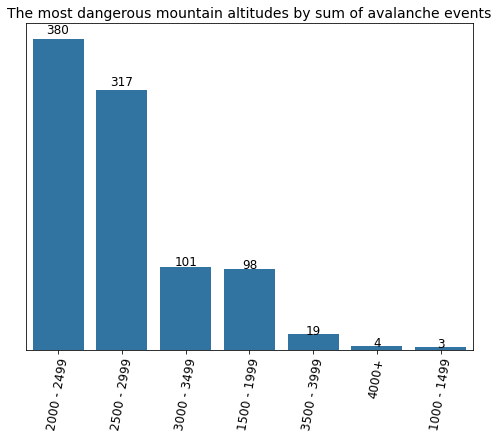

In [14]:
# final visualization for avalanche accidents by altitudes
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
ax = sns.barplot(data=altitude_df, x='altitude', y='avalanche events count', color=base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=12, horizontalalignment='center')
ax.set(yticks=[])
plt.title('The most dangerous mountain altitudes by sum of avalanche events', fontsize=14)
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,.0f}".format(height),
            ha="center", size=12)
    
plt.savefig('dangerous_altitudes_events', bbox_inches='tight', dpi=600)
plt.show();

<a id='viz_3'></a>
### Renaming massifs names to fit massifs we have in shapefile

In [15]:
# displaying uniaue massif names
aval.Massif.unique()

array(["Aiguilles de l'Argentiere/ Sept Laux", 'Aiguilles Rouges',
       'Aravis', 'Bauges', 'Beaufortain', 'Belledonne', 'Briançonnais',
       'Cerces', 'Dévoluy', 'Ecrins', 'Embrunais', 'Fiz',
       'Grandes Rousses', 'Guillestrois', 'Haut Giffre',
       'Haute Maurienne', 'Haute Tarentaise', 'Chaberton', 'Chablais',
       'Champsaur', 'Chartreuse', 'Lauzière', 'Matheysine', 'Maurienne',
       'Mercantour', 'Mont Blanc', 'Mont Thabor', 'Oisans', 'Parpaillon',
       'Pelvoux', 'Queyras', 'Taillefer', 'Ubaye', 'Ubaye - Parpaillon',
       'Valbonnais', 'Vanoise', 'Vercors'], dtype=object)

In [16]:
# displaying total number of massifs
# clearly we need to regroup these massifs, because in shapefile there is only 23 massifs of French Alps
aval.Massif.nunique()

37

In [17]:
# renaming massifs to fit groups in shapefile
aval['Massif_2'] = aval.Massif.apply(lambda x: 
                                     "Hte-maurie" if x == "Haute Maurienne"
                                     else "Hte-tarent" if x == "Haute Tarentaise"                                    
                                     else "Thabor" if x == "Cerces"
                                     else "Vanoise" if x == "Lauzière"
                                     else "Mont-Blanc" if x == "Aiguilles Rouges"
                                     else "Mont-Blanc" if x == "Mont Blanc"
                                     else "Mont-Blanc" if x == "Haut Giffre"
                                     else "Beaufortin" if x == "Beaufortain"
                                     else "Gdes-rouss" if x == "Grandes Rousses"
                                     else "Thabor" if x == "Chaberton"
                                     else "Devoluy" if x == "Dévoluy"                                     
                                     else "Thabor" if x == "Mont Thabor"                                    
                                     else "Parpaillon" if x == "Guillestrois"
                                     else "Pelvoux" if x == "Ecrins"
                                     else "Queyras" if x == "Briançonnais"
                                     else "Parpaillon" if x == "Ubaye - Parpaillon"
                                     else "Oisans" if x == "Taillefer"
                                     else "Oisans" if x == "Matheysine"                                     
                                     else "Parpaillon" if x == "Embrunais"
                                     else "Oisans" if x == "Valbonnais"
                                     else "Mont-Blanc" if x == "Fiz"
                                     else "Belledonne" if x == "Aiguilles de l'Argentiere/ Sept Laux"                                   
                                     else x)

In [18]:
# checking the result
aval.head()

,Id,Pays,Massif,Sommet/secteur,itinéraire,Orientation,Date,year,month,day,date_format,Heure,Description,Décl à distance,Distance décl,Caractéristique,Dénivelé,Origine principale,Origine secondaire,Alti départ,Commentaire zone départ,Epaisseur rupture,Epaisseur max rupture,Longueur rupture,Ecoulement principal,Commentaire type écoulement,Alti arrivée,Commentaire zone arrivée,Qualité neige,Commentaire qualité neige,Commentaire qualité transportée,Risque MF,altitude_edited,Massif_2
0,1557382479001,France,Aiguilles de l'Argentiere/ Sept Laux,col de l'Amiante,Départ de Rieux Claret pour direction du Roche...,E,07/05/2019,2019,5,7,2019-05-07,11:00,Départ provoqué par une skieuse lors de la des...,False,0,NaN,0,Skieur rando. descente,Neige,2750,NaN,0,50,0,NaN,NaN,2700,NaN,NaN,NaN,NaN,Inconnu,2500 - 2999,Belledonne
1,50000560,France,Aiguilles Rouges,L'Index,NaN,SE,18/12/2010,2010,12,18,2010-12-18,13:00:00,Une plaque friable a été déclenchée par un ski...,False,0,Plaque friable,200,Skieur hors piste,NaN,2150,L'épaisseur de la rupture était de 40 à 80 cm ...,40,80,20,NaN,NaN,1950,NaN,NaN,NaN,NaN,3 - MARQUE,2000 - 2499,Mont-Blanc
2,50000693,France,Aiguilles Rouges,Brévent,Combe de Charlanon,T,23/01/2012,2012,1,23,2012-01-23,NaN,Cette plaque décrite comme &quot;monstrueuse&q...,False,0,Plaque de fond,0,Inconnue,NaN,2000,NaN,0,0,0,Dense,NaN,0,NaN,NaN,NaN,NaN,2 - LIMITE,2000 - 2499,Mont-Blanc
3,1390063748315,France,Aiguilles Rouges,Col de Bérard,Traversée Crochues - Bérard,W,18/01/2014,2014,1,18,2014-01-18,NaN,Un petit incident qui remet les pendules à l'h...,False,0,Plaque à vent,150,Skieur rando. montée,NaN,2400,NaN,0,0,0,NaN,NaN,0,NaN,NaN,séche dense,NaN,3 - MARQUE,2000 - 2499,Mont-Blanc
4,1426167935840,France,Aiguilles Rouges,Flégère,Lac Blanc,SE,06/03/2015,2015,3,6,2015-03-06,NaN,Avalanche probablement partie spontanément. <b...,False,0,Plaque à vent,0,NaN,NaN,2280,NaN,0,0,0,Dense,NaN,0,NaN,Sèche dure,NaN,NaN,3 - MARQUE,2000 - 2499,Mont-Blanc


<a id='viz_4'></a>
### Cleaning data for getting sum of avalanche events for each massif

In [19]:
# selecting only needed columns for new dataframe with sum of avalanche events in each massif
aval_alps = aval[["Massif_2","date_format"]]
aval_alps

,Massif_2,date_format
0,Belledonne,2019-05-07
1,Mont-Blanc,2010-12-18
2,Mont-Blanc,2012-01-23
3,Mont-Blanc,2014-01-18
4,Mont-Blanc,2015-03-06
...,...,...
1162,Vercors,2014-02-08
1163,Vercors,2015-01-28
1164,Vercors,2018-03-18
1165,Vercors,2018-04-07


In [20]:
# general info about new dataframe
aval_alps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Massif_2     1167 non-null   object        
 1   date_format  1167 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 18.4+ KB


In [21]:
# changing data type datetime of date_format to string
aval_alps.date_format = aval_alps.date_format.astype(str)

C:\Users\kamil\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
# checking the result
aval_alps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Massif_2     1167 non-null   object
 1   date_format  1167 non-null   object
dtypes: object(2)
memory usage: 18.4+ KB


In [23]:
# renaming columns
aval_alps.columns = ['massif_name', 'day_of_event']
aval_alps.head()

,massif_name,day_of_event
0,Belledonne,2019-05-07
1,Mont-Blanc,2010-12-18
2,Mont-Blanc,2012-01-23
3,Mont-Blanc,2014-01-18
4,Mont-Blanc,2015-03-06


In [24]:
# grouping dataframe by massifs to get sum of avalanche events
avalanche_alps = aval_alps.groupby("massif_name").count().reset_index()
avalanche_alps

,massif_name,day_of_event
0,Aravis,57
1,Bauges,8
2,Beaufortin,43
3,Belledonne,46
4,Chablais,11
5,Champsaur,4
6,Chartreuse,15
7,Devoluy,15
8,Gdes-rouss,18
9,Hte-maurie,210


<a id='viz_5'></a>
### Import of data from shapefile for later geospatial visualization

In [25]:
# importing geopandas for dealing with geospatial data
import geopandas as gpd

In [26]:
# reading shapefile of massifs in french Alps
gdf_alps = gpd.read_file(r".\\shapefile\\massifs_alpes_2154.shp")

In [27]:
gdf_alps.head()

,massif_num,nom,nom_reduit,superficie,perimetre,geometry
0,1,Chablais,Chablais,1385.316376,170.748079,"POLYGON ((999869.605 6556953.256, 999013.523 6..."
1,2,Aravis,Aravis,1073.660018,129.974582,"POLYGON ((976925.610 6556341.034, 978673.707 6..."
2,3,Mont-Blanc,Mont-Blanc,585.532682,125.642640,"POLYGON ((995389.567 6528045.104, 994136.335 6..."
3,4,Bauges,Bauges,872.270863,122.259312,"POLYGON ((946630.789 6532687.729, 947533.532 6..."
4,5,Beaufortin,Beaufortin,755.453226,116.226856,"POLYGON ((990566.082 6523570.533, 990407.893 6..."


In [28]:
# displaying general info about dataframe
gdf_alps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   massif_num  23 non-null     int64   
 1   nom         23 non-null     object  
 2   nom_reduit  23 non-null     object  
 3   superficie  23 non-null     float64 
 4   perimetre   23 non-null     float64 
 5   geometry    23 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 1.2+ KB


In [29]:
# merge of shapefile dataframe with dataframe with sum of avalanche events
avalanche_viz = pd.merge(gdf_alps, avalanche_alps, how="left", left_on="nom_reduit", right_on="massif_name")

In [30]:
# checking the result
avalanche_viz.head()

,massif_num,nom,nom_reduit,superficie,perimetre,geometry,massif_name,day_of_event
0,1,Chablais,Chablais,1385.316376,170.748079,"POLYGON ((999869.605 6556953.256, 999013.523 6...",Chablais,11.0
1,2,Aravis,Aravis,1073.660018,129.974582,"POLYGON ((976925.610 6556341.034, 978673.707 6...",Aravis,57.0
2,3,Mont-Blanc,Mont-Blanc,585.532682,125.642640,"POLYGON ((995389.567 6528045.104, 994136.335 6...",Mont-Blanc,79.0
3,4,Bauges,Bauges,872.270863,122.259312,"POLYGON ((946630.789 6532687.729, 947533.532 6...",Bauges,8.0
4,5,Beaufortin,Beaufortin,755.453226,116.226856,"POLYGON ((990566.082 6523570.533, 990407.893 6...",Beaufortin,43.0


In [31]:
# displaying column names
avalanche_viz.columns

Index(['massif_num', 'nom', 'nom_reduit', 'superficie', 'perimetre',
       'geometry', 'massif_name', 'day_of_event'],
      dtype='object')

In [32]:
# renaming columns
avalanche_viz.columns = ['massif_num', 'massif', 'massif_name_short', 'surface_area', 
                         'perimeter', 'geometry', 'massif_name_2', 'sum_of_avalanches']

In [33]:
# checking the result
avalanche_viz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   massif_num         23 non-null     int64   
 1   massif             23 non-null     object  
 2   massif_name_short  23 non-null     object  
 3   surface_area       23 non-null     float64 
 4   perimeter          23 non-null     float64 
 5   geometry           23 non-null     geometry
 6   massif_name_2      22 non-null     object  
 7   sum_of_avalanches  22 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 1.6+ KB


In [34]:
# deeper look on whole dataframe
avalanche_viz

,massif_num,massif,massif_name_short,surface_area,perimeter,geometry,massif_name_2,sum_of_avalanches
0,1,Chablais,Chablais,1385.316376,170.748079,"POLYGON ((999869.605 6556953.256, 999013.523 6...",Chablais,11.0
1,2,Aravis,Aravis,1073.660018,129.974582,"POLYGON ((976925.610 6556341.034, 978673.707 6...",Aravis,57.0
2,3,Mont-Blanc,Mont-Blanc,585.532682,125.642640,"POLYGON ((995389.567 6528045.104, 994136.335 6...",Mont-Blanc,79.0
3,4,Bauges,Bauges,872.270863,122.259312,"POLYGON ((946630.789 6532687.729, 947533.532 6...",Bauges,8.0
4,5,Beaufortin,Beaufortin,755.453226,116.226856,"POLYGON ((990566.082 6523570.533, 990407.893 6...",Beaufortin,43.0
5,6,Haute-Tarentaise,Hte-tarent,642.066618,141.562943,"POLYGON ((1018903.144 6493855.250, 1018430.597...",Hte-tarent,115.0
6,10,Vanoise,Vanoise,1218.452875,170.747060,"POLYGON ((991482.725 6503181.795, 993104.466 6...",Vanoise,190.0
7,9,Maurienne,Maurienne,917.119330,172.057111,"POLYGON ((983410.901 6466547.737, 983726.454 6...",Maurienne,81.0
8,7,Chartreuse,Chartreuse,846.994238,120.161035,"POLYGON ((934227.542 6488155.490, 934469.883 6...",Chartreuse,15.0
9,8,Belledonne,Belledonne,993.456150,154.882390,"POLYGON ((950810.720 6469559.152, 949675.761 6...",Belledonne,46.0


In [35]:
# displaying number of massifs
avalanche_alps.massif_name.nunique()

22

In [36]:
# checking match for massif names in previous file
np.sort(avalanche_alps.massif_name.unique())

array(['Aravis', 'Bauges', 'Beaufortin', 'Belledonne', 'Chablais',
       'Champsaur', 'Chartreuse', 'Devoluy', 'Gdes-rouss', 'Hte-maurie',
       'Hte-tarent', 'Maurienne', 'Mercantour', 'Mont-Blanc', 'Oisans',
       'Parpaillon', 'Pelvoux', 'Queyras', 'Thabor', 'Ubaye', 'Vanoise',
       'Vercors'], dtype=object)

In [37]:
# and with final dataframe, there is just one difference Ht_Var_Ver because of no avalanche there
np.sort(avalanche_viz.massif_name_short.unique())

array(['Aravis', 'Bauges', 'Beaufortin', 'Belledonne', 'Chablais',
       'Champsaur', 'Chartreuse', 'Devoluy', 'Gdes-rouss', 'Ht_Var-Ver',
       'Hte-maurie', 'Hte-tarent', 'Maurienne', 'Mercantour',
       'Mont-Blanc', 'Oisans', 'Parpaillon', 'Pelvoux', 'Queyras',
       'Thabor', 'Ubaye', 'Vanoise', 'Vercors'], dtype=object)

In [38]:
# replacing nan with string
avalanche_viz.fillna({'massif_name_2':'No avalanche', 'sum_of_avalanches':'No avalanche'}, inplace = True)

In [39]:
# checking the result
avalanche_viz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   massif_num         23 non-null     int64   
 1   massif             23 non-null     object  
 2   massif_name_short  23 non-null     object  
 3   surface_area       23 non-null     float64 
 4   perimeter          23 non-null     float64 
 5   geometry           23 non-null     geometry
 6   massif_name_2      23 non-null     object  
 7   sum_of_avalanches  23 non-null     object  
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 1.6+ KB


<a id='viz_6'></a>
### Geospatial visualization with Bokeh

In [40]:
# imporing objects from Bokeh library for further use for visualization
from bokeh.io import save, output_notebook
from bokeh.models import (ColorBar,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper)
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

In [41]:
# importing json because geosource has to be in format of JSON
import json
geosource = GeoJSONDataSource(geojson = avalanche_viz.to_json())

In [42]:
# define color palettes
palette = brewer['YlGnBu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# instantiate LinearColorMapper that linearly maps numbers in a range into a sequence of colors
# and nan values will be colored in grey
color_mapper = LinearColorMapper(palette = palette, low = 4, high = 210, nan_color = '#d9d9d9')

# create color bar
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

In [43]:
# create figure object
p = figure(title = 'Avalanche events from 10/2010 till 09/2019 in 23 massifs of french Alps', 
           plot_height = 700,
           plot_width = 500, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [44]:
# add patch renderer to figure
massifs = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

In [45]:
# create hover tool
p.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@massif'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p.add_layout(color_bar, 'below')

In [46]:
# final visualization can be seen as html page
output_notebook()
show(p)

Loading BokehJS ...